In [45]:
import spotipy
import spotipy.util as util
from datetime import datetime
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from math import *
#import seaborn as sns
username = "rckprnv"
scope = "user-library-read"
#export SPOTIPY_CLIENT_ID ='3aa12f8e691c4df69ea5cf90a8d14b83'
#export SPOTIPY_CLIENT_SECRET ='380a5fc6c96e4fdcaf568425b919a00e'
#export SPOTIPY_REDIRECT_URI ='http://localhost:8888'
#client_credentials_manager = SpotifyClientCredentials(client_id='3aa12f8e691c4df69ea5cf90a8d14b83', client_secret='380a5fc6c96e4fdcaf568425b919a00e')
token = util.prompt_for_user_token(username,scope,client_id='35018e55ab1d418f85142ed667b3f069',client_secret='5150cff246404d1795f3d4c2c559e902',redirect_uri='http://localhost:8888/callback/')


#playlists = sp.user_playlists('rckprnv')
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print (track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print ("Can't get token for"), username

How To Build A Relationship - Flume
Marigold - Periphery
Flight - Devin Townsend
Azadi - Dub Sharma
take care - EDEN
wings - EDEN
icarus - EDEN
lost//found - EDEN
gold - EDEN
forever//over - EDEN
float - EDEN
wonder - EDEN
love; not wrong (brave) - EDEN
falling in reverse - EDEN
Paranoid - Lauv
Machine Gun - Live at the Fillmore East - Jimi Hendrix
Tune Kaha - Prateek Kuhad
Gustaakh - The Local Train
Dilnawaz - The Local Train
Khudi - The Local Train


In [46]:
df_saved_tracks = pd.DataFrame()
track_list = ''
added_ts_list = []
artist_list = []
title_list = []
added_ts_list_year = []
added_ts_list_month=[]
added_ts_list_month_index=[]

more_songs = True
offset_index = 0

while more_songs:
    songs = sp.current_user_saved_tracks(offset=offset_index)

    for song in songs['items']:
        #join track ids to a string for audio_features function
        track_list += song['track']['id'] +','

        #get the time when the song was added
        added_ts_list.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ'))
        added_ts_list_year.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ').year)
        month_abbr=calendar.month_abbr[(datetime.strptime(song['added_at'],'%Y-%m-%dT%H:%M:%SZ').month)] + "," + str(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ').year)
        added_ts_list_month.append(month_abbr)
        added_ts_list_month_index.append(datetime.strptime(song['added_at'],'%Y-%m-%dT%H:%M:%SZ').month)
        #get the title of the song
        title_list.append(song['track']['name'])

        #get all the artists in the song
        artists = song['track']['artists']
        artists_name = ''
        for artist in artists:
            artists_name += artist['name']  + ','
        artist_list.append(artists_name[:-1])
    #print(type(month_abbr))
    #get the track features and append into a dataframe
    track_features = sp.audio_features(track_list[:-1])
    df_temp = pd.DataFrame(track_features)
    df_saved_tracks = df_saved_tracks.append(df_temp)
    track_list = ''

    if songs['next'] == None:
        # no more songs in playlist
        more_songs = False
    else:
        # get the next n songsss 'st
        offset_index += songs['limit']

#include timestamp added, title and artists of a song
df_saved_tracks['added_at'] = added_ts_list
df_saved_tracks['song_title'] = title_list
df_saved_tracks['artists'] = artist_list
df_saved_tracks['added_at_year'] = added_ts_list_year
df_saved_tracks['added_at_month']=added_ts_list_month
df_saved_tracks["added_at_month_index"]=added_ts_list_month_index



In [47]:
df_saved_tracks.head()


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,added_at,song_title,artists,added_at_year,added_at_month,added_at_month_index
0,0.09790,https://api.spotify.com/v1/audio-analysis/1Ttu...,0.765,184817,0.814,1Ttu4TYbFIXYDFzOgfVedO,0.000000,6,0.339,-3.399,...,https://api.spotify.com/v1/tracks/1Ttu4TYbFIXY...,audio_features,spotify:track:1Ttu4TYbFIXYDFzOgfVedO,0.6280,2019-03-25 18:59:31,How To Build A Relationship,"Flume,JPEGMAFIA",2019,"Mar,2019",3
1,0.00222,https://api.spotify.com/v1/audio-analysis/2YZZ...,0.211,439840,0.949,2YZZ8qsDdvC008LgtpMoI6,0.000535,0,0.103,-5.724,...,https://api.spotify.com/v1/tracks/2YZZ8qsDdvC0...,audio_features,spotify:track:2YZZ8qsDdvC008LgtpMoI6,0.0642,2019-03-23 14:54:50,Marigold,Periphery,2019,"Mar,2019",3
2,0.69800,https://api.spotify.com/v1/audio-analysis/0LNr...,0.386,332467,0.322,0LNroCmxXfvqBoIKjfAhRi,0.704000,2,0.269,-16.648,...,https://api.spotify.com/v1/tracks/0LNroCmxXfvq...,audio_features,spotify:track:0LNroCmxXfvqBoIKjfAhRi,0.0793,2019-03-23 14:25:01,Flight,"Devin Townsend,Ché Aimee Dorval",2019,"Mar,2019",3
3,0.78400,https://api.spotify.com/v1/audio-analysis/07qS...,0.846,155471,0.693,07qSl2sNpFNILaYyZ6yIS9,0.000417,9,0.339,-8.041,...,https://api.spotify.com/v1/tracks/07qSl2sNpFNI...,audio_features,spotify:track:07qSl2sNpFNILaYyZ6yIS9,0.4560,2019-03-22 12:22:18,Azadi,"Dub Sharma,DIVINE,Alia Bhatt,Ranveer Singh",2019,"Mar,2019",3
4,0.56600,https://api.spotify.com/v1/audio-analysis/4IWB...,0.267,195872,0.493,4IWBM3QbriYkFLVrIBAHwx,0.002690,11,0.476,-7.921,...,https://api.spotify.com/v1/tracks/4IWBM3QbriYk...,audio_features,spotify:track:4IWBM3QbriYkFLVrIBAHwx,0.3050,2019-03-20 20:47:21,take care,EDEN,2019,"Mar,2019",3


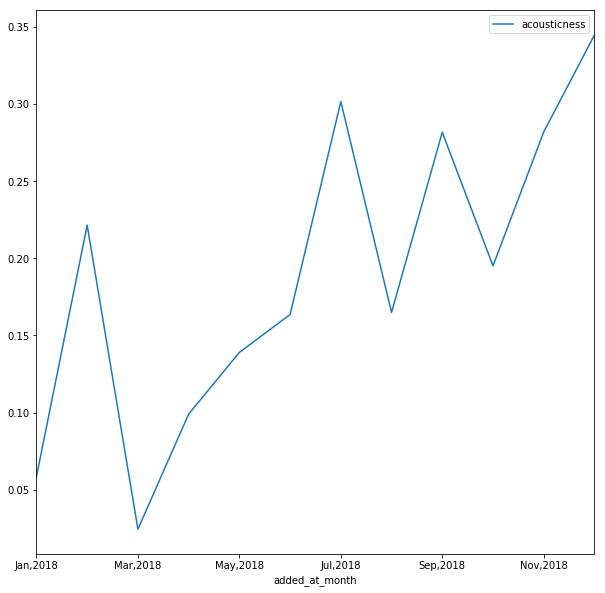

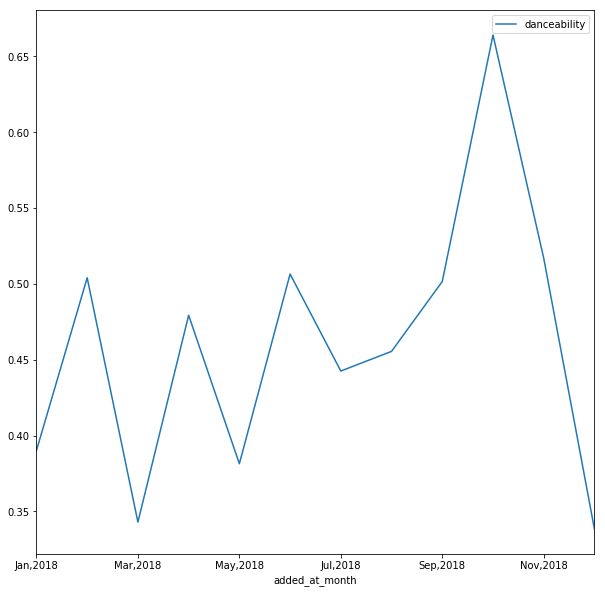

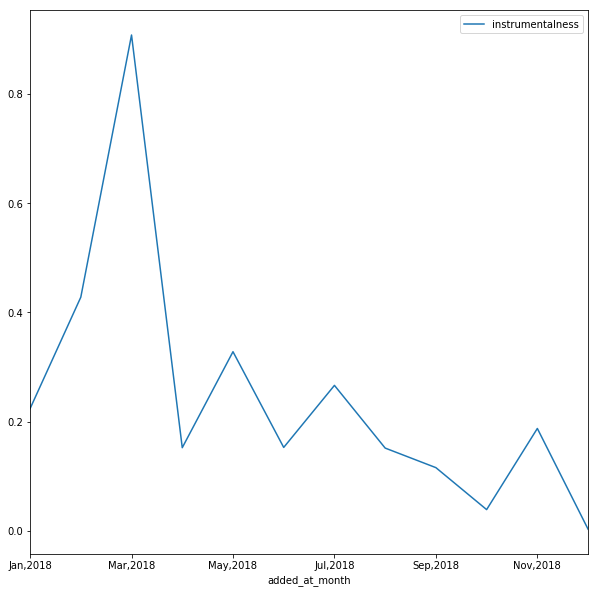

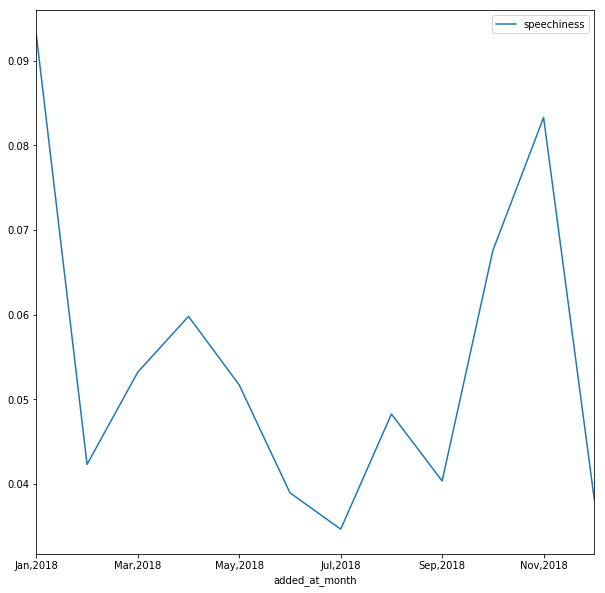

In [48]:

df_mean = df_saved_tracks.loc[df_saved_tracks['added_at_year'] == 2018]
#print(df_mean)

df_mean =  df_mean.groupby(['added_at_month']).mean().sort_values('added_at_month_index')
#print(df_mean)


df_mean.plot(kind = 'line',y='acousticness', figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='danceability',figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='instrumentalness', figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='speechiness', figsize = (10,10))
plt.show()


#df_mean_frame = pd.DataFrame({'added_at_year' : df_saved_tracks['added_at_year'], 'acousticness': df_mean['acousticness']})
#print(df_mean_frame)
# = pd.DataFrame(df_saved_tracks.groupby(['added_at_year']).mean())
#plt.plot(df_mean_frame['added_at_year'],df_mean_frame['acouticness'] )



In [49]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
df_recent = df_saved_tracks.loc[df_saved_tracks['added_at_year'] == 2019]

df_cluster = df_recent[cluster_features]
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-9.89256064e-01  1.60643272e+00 -5.19386234e-01  1.33455397e+00
   5.73384661e+00]
 [-1.28873916e+00 -1.79993526e+00 -5.17244377e-01  1.96351761e+00
   2.34616189e+00]
 [ 8.89086381e-01 -7.23916491e-01  2.29905793e+00 -9.57669086e-01
  -4.84094712e-01]
 [ 1.15827060e+00  2.10447570e+00 -5.17716787e-01  7.70816184e-01
   2.39235759e+00]
 [ 4.75919905e-01 -1.45560925e+00 -5.08616895e-01 -1.60981806e-01
   8.52500897e-01]
 [ 1.03932874e+00 -6.80875741e-01 -5.19182858e-01 -2.96092514e-01
  -9.14312557e-02]
 [ 8.82826283e-01 -5.70199525e-01 -5.13220888e-01  5.33317320e-02
   7.90906630e-01]
 [ 1.64342821e+00 -4.04185201e-01 -5.17100252e-01 -2.04181605e+00
  -1.25308103e-01]
 [ 6.19902162e-01  1.20676861e+00 -5.19386234e-01 -3.42682413e-01
   1.69942208e+00]
 [ 1.64342821e+00 -1.41256850e+00 -4.95925889e-01 -9.11079187e-01
  -1.17608819e-01]
 [-4.67982897e-02  8.77090927e-02 -5.07335784e-01 -7.23513733e-03
   6.68855776e+00]
 [ 1.65907845e+00 -6.68578383e-01 -4.95245299e-01 -1.60992768e+00

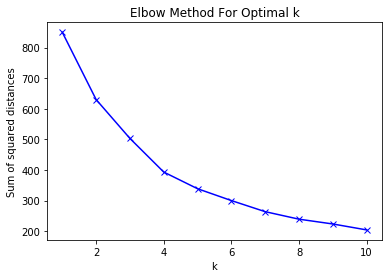

In [50]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)
df_recent.loc[:,'cluster'] = kmeanModel.labels_
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df_recent[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,cluster,acousticness,danceability,instrumentalness,energy,speechiness
0,0,0.730907,0.400512,0.071052,0.323263,0.049209
1,1,0.132367,0.508459,0.019358,0.700246,0.049652
2,2,0.579742,0.671161,0.031454,0.450645,0.048958
3,3,0.353175,0.420875,0.689333,0.463821,0.036912
4,4,0.401829,0.590000,0.027236,0.724273,0.266364


In [52]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)
    

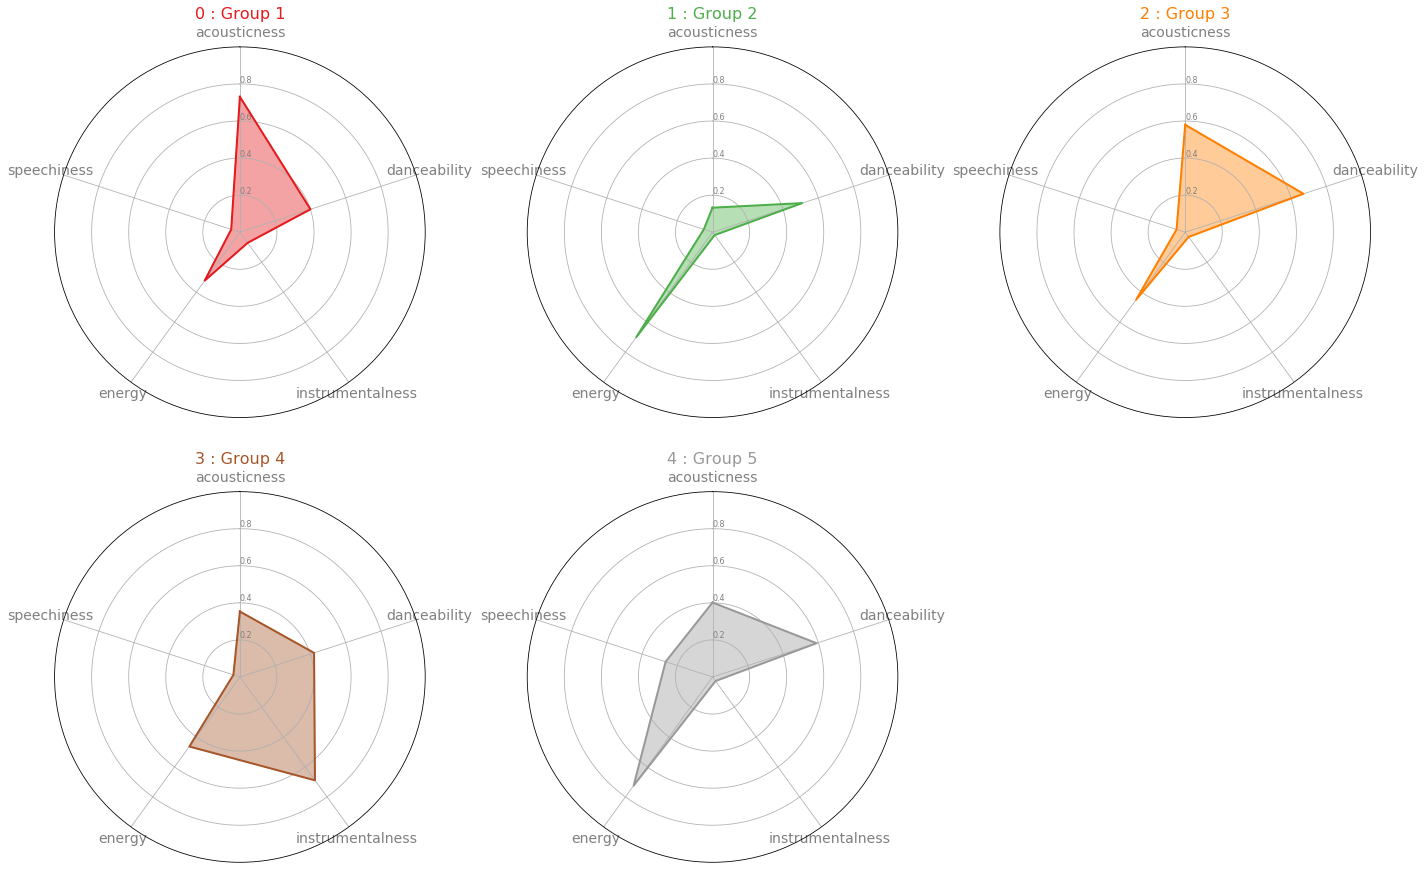

In [54]:
# initialize the figure
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set1", len(df_radar.index))

# Create cluster name
title_list = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()